# 
Comcast Telecom Consumer Complaints

Description:
Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
# use style class to set the grid style
from matplotlib import style
%matplotlib inline

In [2]:
# import comcast telecom consumer complaints dataset
df_dataset = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
# View first 5 complaints
df_dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
# Check the column names
df_dataset.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [5]:
# Check number of observations in the dataset and shape of the dataset
df_dataset.shape

(2224, 11)

In [6]:
# Create date time objects using to_datetime methods
df_dataset['Date_Time'] = df_dataset['Date_month_year'] + " " + df_dataset["Time"]
df_dataset['Date'] = pd.to_datetime(df_dataset['Date'])
df_dataset['Date_month_year'] = pd.to_datetime(df_dataset['Date_month_year'])
df_dataset['Date_Time'] = pd.to_datetime(df_dataset['Date_Time'])

In [7]:
df_dataset.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
Date_Time                      datetime64[ns]
dtype: object

In [8]:
df_dataset = df_dataset.set_index(df_dataset['Date_Time'])

In [9]:
# Look at the records
df_dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Time
Date_Time,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [10]:
# Look at the count value on each day
df_dataset["Date_month_year"].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-17      7
2015-12-05      7
2015-05-04      6
2015-11-04      5
2015-03-05      5
Name: Date_month_year, Length: 91, dtype: int64

In [11]:
type(df_dataset["Date_month_year"].value_counts())

pandas.core.series.Series

In [12]:
# Create a daywise series
series_daily = df_dataset["Date_month_year"].value_counts()

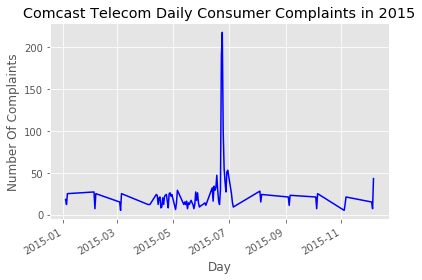

In [13]:
# Provide trend chart for the number of complaints daily
style.use('ggplot')
series_daily.plot(kind='line', grid=True, color=['b'], linewidth=1.5, alpha=1.0)
plt.xlabel("Day")
plt.ylabel("Number Of Complaints")
plt.title("Comcast Telecom Daily Consumer Complaints in 2015")
plt.tight_layout()
plt.show()

In [14]:
# Provide trend chart for the number of complaints at monthly
series_monthly = df_dataset.groupby(pd.Grouper(freq='M')).size()
print(series_monthly)
print(type(series_monthly))

Date_Time
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64
<class 'pandas.core.series.Series'>


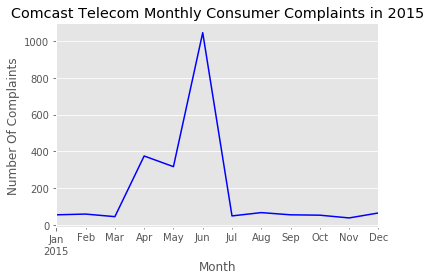

In [15]:
style.use('ggplot')
series_monthly.plot(kind='line', grid=True, color=['b'])
plt.xlabel("Month")
plt.ylabel("Number Of Complaints")
plt.title("Comcast Telecom Monthly Consumer Complaints in 2015")
plt.tight_layout()
plt.show()

In [16]:
# Create a new categorical variable with value as Open and Closed.
# Open and Pending is to be categorized as Open
# Closed and Solved is categorized as Closed
# Create a user defined function to filter the status and return categorized value
def process_ticket_status(tStatus):
    if tStatus.lower() == 'open' or tStatus.lower() == 'pending':
        return "Open"
    else:
        return "Closed"

In [17]:
# Create a new column in the dataset to have a final status based on the categorized variable
df_dataset['FinalStatus'] = df_dataset['Status'].apply(process_ticket_status)

In [18]:
# Look at the dataset
df_dataset.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Time,FinalStatus
Date_Time,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed


In [19]:
# Group the statewise complains
# X-axis will be states and y axis will be ticket status
statewise_complaints = df_dataset.groupby(by=['State', 'FinalStatus']).size().unstack().fillna(0)
statewise_complaints

FinalStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


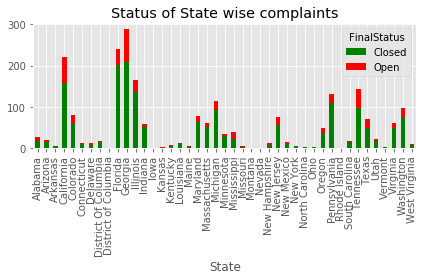

In [20]:
# State wise status of complaints in a stacked bar chart
style.use('ggplot')
statewise_complaints.plot(kind='bar', stacked=True, color=['g', 'r'])
plt.title('Status of State wise complaints')
plt.tight_layout()
plt.show()

In [21]:
# Which state has highest number of complaints
series_maxComplaints = df_dataset.groupby(['State']).size().sort_values(ascending=True).to_frame().reset_index().rename({0:'count'}, axis=1).max()
series_maxComplaints

State    West Virginia
count              288
dtype: object

In [22]:
# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care
# calls.

statewise_complaints_max = df_dataset.groupby(by=['State', 'FinalStatus']).size().unstack().fillna(0).max()
statewise_complaints_max

FinalStatus
Closed    208.0
Open       80.0
dtype: float64

In [23]:
total_complaints = statewise_complaints_max.sum()
print(total_complaints)
print("Percentage of complaints resolved till date : {0:.2f}%".format((statewise_complaints_max['Closed']/ total_complaints)*100))

288.0
Percentage of complaints resolved till date : 72.22%


In [24]:
# Lets see top 10 consumer complains
df_dataset['Customer Complaint'].head(10)

Date_Time
2015-04-22 15:53:50                        Comcast Cable Internet Speeds
2015-08-04 10:22:56         Payment disappear - service got disconnected
2015-04-18 09:55:47                                    Speed and Service
2015-07-05 11:59:35    Comcast Imposed a New Usage Cap of 300GB that ...
2015-05-26 13:25:26           Comcast not working and no service to boot
2015-12-06 21:59:40    ISP Charging for arbitrary data limits with ov...
2015-06-24 10:13:55        Throttling service and unreasonable data caps
2015-06-23 18:56:14    Comcast refuses to help troubleshoot and corre...
2015-01-06 23:46:30                             Comcast extended outages
2015-06-28 18:46:31    Comcast Raising Prices and Not Being Available...
Name: Customer Complaint, dtype: object

In [25]:
# Provide frequence of complaint types
df_dataset['Customer Complaint'].unique()

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [26]:
listInternet = ['internet', 'speed', 'gb', 'data', "throttle", "throttling"]
listBill = ['bill', 'payment', 'fee', 'charge']
def complaint_type(complaintType):
    
    for cml in listInternet:
        if cml in complaintType.lower():
            return "Internet"
    
    for cml in listBill:
        if cml  in complaintType.lower():
            return "Billing"
    return "Other"

In [27]:
df_dataset['Customer Complaint Category'] = df_dataset['Customer Complaint'].apply(complaint_type)

In [28]:
df_dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Time,FinalStatus,Customer Complaint Category
Date_Time,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed,Internet
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed,Billing
2015-04-18 09:55:47,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed,Internet
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open,Internet
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed,Other


In [29]:
df_dataset['Customer Complaint Category'].value_counts()

Other       919
Internet    849
Billing     456
Name: Customer Complaint Category, dtype: int64

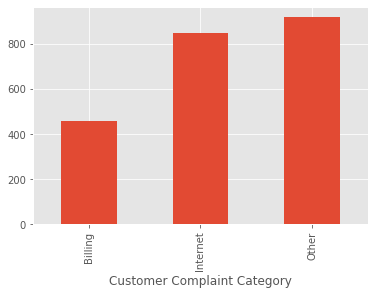

In [30]:
df_dataset.groupby(['Customer Complaint Category']).size().plot(kind='bar')